In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/benjamin/Masterphase/Mastercode


In [3]:
from helper.helper import TSNE_plots, nn_exclude_training, t_dependence_plot_exclude, show_conf

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# How much training data does the NN need close to the phase transition?

In [6]:
from Ising.Data import IsingData
data = IsingData("Ising/large_dataset/")

Loading training data
Loading test data


## Visualize high-dimensional configuration space

PCA completed


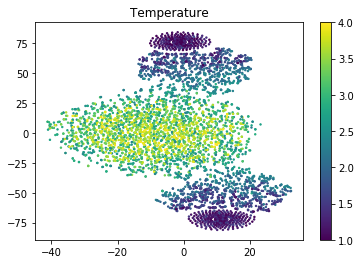

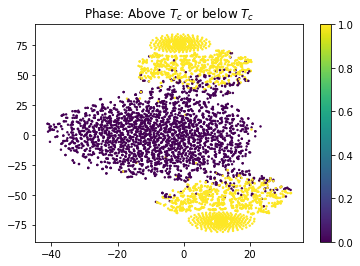

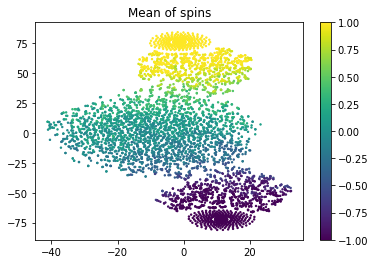

In [7]:
train_embedded = TSNE_plots(data.get_batch(5000), dim_PCA=20)

## Train different NN architectures on all states vs high and low limit only

In [27]:
plt.rcParams['figure.figsize'] = (16, 8)

In [10]:
exclude=[(1.2+0.1*x, 2.2+0.1*x) for x in np.arange(10)]
results, _ = nn_exclude_training(data.train_data, nn="Simple", exclude=exclude, keepNN=False)

Excluding data in [1.2, 2.2]
Training 40 epochs took 10.096s
Accuracy is 0.9399999976158142
Excluding data in [1.3, 2.3000000000000003]
Training 40 epochs took 10.013s
Accuracy is 0.8899999856948853
Excluding data in [1.4, 2.4000000000000004]
Training 40 epochs took 10.259s
Accuracy is 0.9100000262260437
Excluding data in [1.5, 2.5]
Training 40 epochs took 10.397s
Accuracy is 0.8999999761581421
Excluding data in [1.6, 2.6]
Training 40 epochs took 10.682s
Accuracy is 0.8899999856948853
Excluding data in [1.7, 2.7]
Training 40 epochs took 11.061s
Accuracy is 0.9300000071525574
Excluding data in [1.8, 2.8000000000000003]
Training 40 epochs took 10.645s
Accuracy is 0.9300000071525574
Excluding data in [1.9, 2.9000000000000004]
Training 40 epochs took 10.835s
Accuracy is 0.949999988079071
Excluding data in [2.0, 3.0]
Training 40 epochs took 10.119s
Accuracy is 0.949999988079071
Excluding data in [2.1, 3.1]
Training 40 epochs took 10.978s
Accuracy is 0.949999988079071


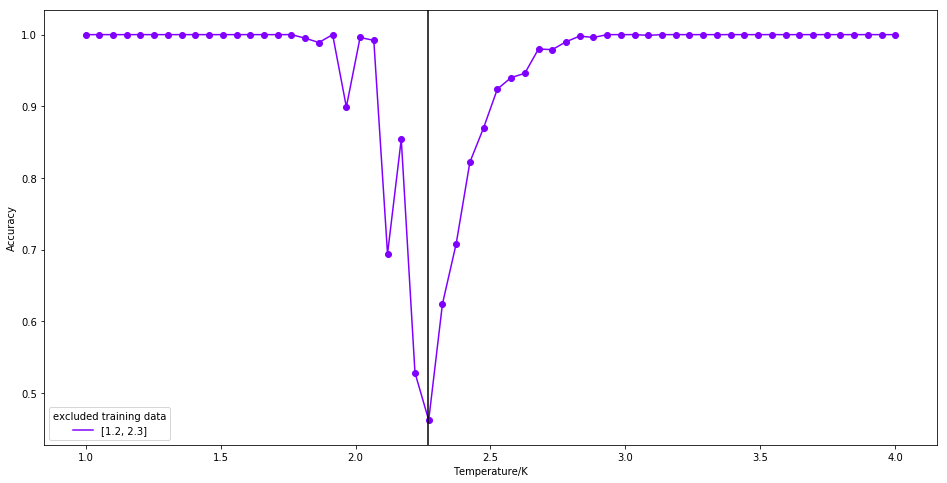

In [31]:
t_dependence_plot_exclude(results[7:8])

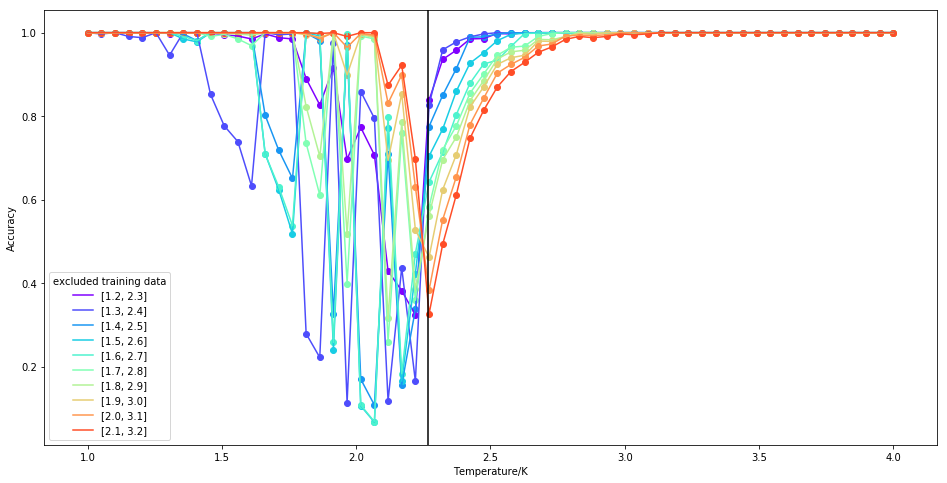

In [29]:
t_dependence_plot_exclude(results)

The SimpleNN fails to identify low temperature states properly. This is probably due to the fact that this requires non-local knowledge (ferromagnetic regions). Though still strange that the effect is extreme for some temperatures.

In [13]:
pexclude=[(1.2+0.1*x, 2.2+0.1*x) for x in np.arange(10)]
presults, _ = nn_exclude_training(data.train_data, nn="Paper", exclude=pexclude, keepNN=False)

Excluding data in [1.2, 2.2]
Training 40 epochs took 13.272s
Accuracy is 0.949999988079071
Excluding data in [1.3, 2.3000000000000003]
Training 40 epochs took 12.971s
Accuracy is 0.9300000071525574
Excluding data in [1.4, 2.4000000000000004]
Training 40 epochs took 11.228s
Accuracy is 0.9200000166893005
Excluding data in [1.5, 2.5]
Training 40 epochs took 11.362s
Accuracy is 0.949999988079071
Excluding data in [1.6, 2.6]
Training 40 epochs took 11.284s
Accuracy is 0.949999988079071
Excluding data in [1.7, 2.7]
Training 40 epochs took 12.123s
Accuracy is 0.9599999785423279
Excluding data in [1.8, 2.8000000000000003]
Training 40 epochs took 11.88s
Accuracy is 0.9599999785423279
Excluding data in [1.9, 2.9000000000000004]
Training 40 epochs took 11.741s
Accuracy is 0.949999988079071
Excluding data in [2.0, 3.0]
Training 40 epochs took 12.213s
Accuracy is 0.949999988079071
Excluding data in [2.1, 3.1]
Training 40 epochs took 12.851s
Accuracy is 0.9399999976158142


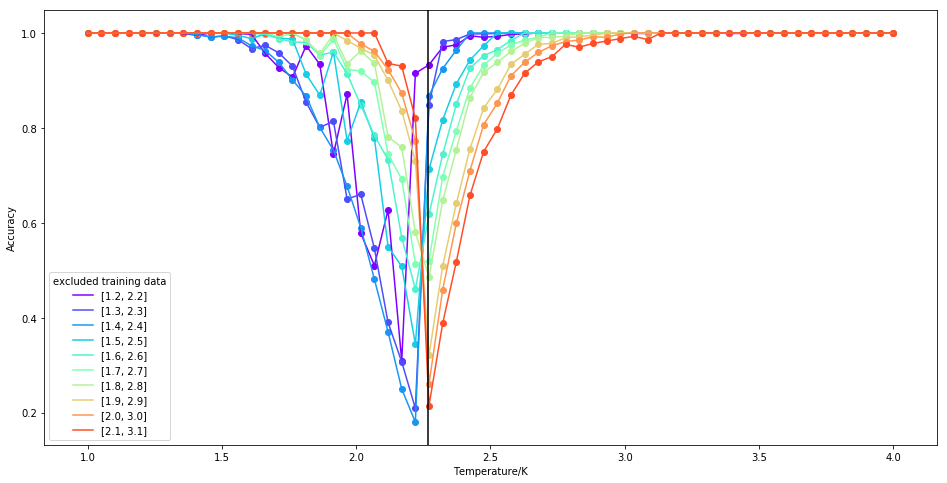

In [32]:
t_dependence_plot_exclude(presults, exclude=pexclude) 

In [45]:
p2res, _ = nn_exclude_training(data.train_data, nn="Paper", exclude=[(0,0)], keepNN=False)

Excluding data in [0, 0]
After 1.352s of training (epoch 3/40)
Accuracy is 0.9399999976158142
After 2.391s of training (epoch 4/40)
Accuracy is 0.9599999785423279
After 3.419s of training (epoch 5/40)
Accuracy is 0.9200000166893005
After 4.449s of training (epoch 6/40)
Accuracy is 0.9599999785423279
After 5.475s of training (epoch 7/40)
Accuracy is 0.949999988079071
After 6.539s of training (epoch 8/40)
Accuracy is 0.9599999785423279
After 7.935s of training (epoch 10/40)
Accuracy is 0.949999988079071
After 9.335s of training (epoch 12/40)
Accuracy is 0.9599999785423279
After 10.748s of training (epoch 14/40)
Accuracy is 0.9599999785423279
After 12.146s of training (epoch 16/40)
Accuracy is 0.9599999785423279
After 13.549s of training (epoch 18/40)
Accuracy is 0.9599999785423279
After 14.551s of training (epoch 19/40)
Accuracy is 0.9700000286102295
After 15.948s of training (epoch 21/40)
Accuracy is 0.9599999785423279
After 17.034s of training (epoch 22/40)
Accuracy is 0.95999997854232

In [48]:
30*23**2/(3600)

4.408333333333333

In [1]:
t_dependence_plot_exclude(p2res, exclude=[(0,0)]) 
t_dependence_plot_exclude(presults, exclude=pexclude) 

NameError: name 't_dependence_plot_exclude' is not defined

In [42]:
X = 0.1*np.arange(10)
Y = 0.1*np.arange(15)

2.2711839000315694

In [21]:
cexclude=[(1.2+0.1*x, 2.2+0.1*x) for x in np.arange(10)]
cresults, _ = nn_exclude_training(data.train_data, nn="Conv", exclude=cexclude, keepNN=False)

Excluding data in [1.2, 2.2]
After 20.611s of training (epoch 19/40)
Accuracy is 0.8500000238418579
After 41.059s of training (epoch 39/40)
Accuracy is 0.5799999833106995
Training 40 epochs took 42.533s
Accuracy is 0.5799999833106995
Excluding data in [1.3, 2.3000000000000003]
After 20.12s of training (epoch 20/40)
Accuracy is 0.8700000047683716
After 40.954s of training (epoch 40/40)
Training 40 epochs took 40.954s
Accuracy is 0.8799999952316284
Excluding data in [1.4, 2.4000000000000004]
After 20.616s of training (epoch 20/40)
Accuracy is 0.8999999761581421
After 40.973s of training (epoch 39/40)
Accuracy is 0.8999999761581421
Training 40 epochs took 42.472s
Accuracy is 0.8999999761581421
Excluding data in [1.5, 2.5]
After 20.462s of training (epoch 20/40)
Accuracy is 0.9300000071525574
After 41.427s of training (epoch 40/40)
Training 40 epochs took 41.427s
Accuracy is 0.9300000071525574
Excluding data in [1.6, 2.6]
After 20.662s of training (epoch 20/40)
Accuracy is 0.76999998092651

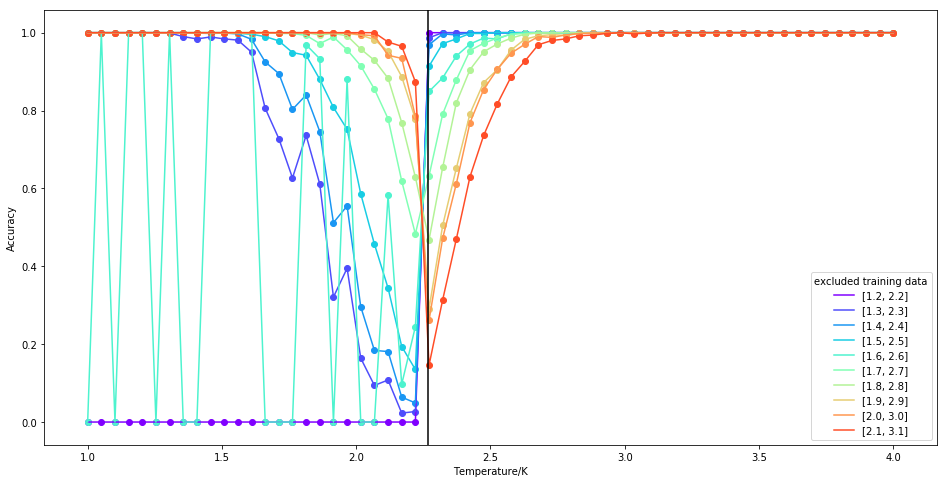

In [33]:
t_dependence_plot_exclude(cresults, exclude=cexclude)

Don't understand why this network fails for very low offset and resolves to always guess the most likely class, maybe dropout and balancing classes can help to leave this local minimum of the loss function.

otherwise: Both NN seem to be able to identify $T_c$ if enough data is given.

# Looking at configurations at certain temperatures

In [23]:
temperatures = np.unique(data.test_data[2])
print(temperatures)

[ 1.          1.05084735  1.10169529  1.15254245  1.20338971  1.25423776
  1.30508435  1.3559322   1.4067804   1.45762608  1.50847537  1.55932288
  1.61016854  1.66101644  1.71186563  1.76271091  1.81355889  1.86440552
  1.91525385  1.9661005   2.01695045  2.06779472  2.11864407  2.16948917
  2.2203374   2.2711839   2.32203354  2.37287894  2.42373124  2.47457375
  2.52542471  2.57627049  2.62711976  2.6779641   2.72881078  2.77966177
  2.83051178  2.88135447  2.93220737  2.98305327  3.03389774  3.08474409
  3.13559242  3.18643852  3.23728314  3.28813247  3.33898735  3.38983051
  3.44068263  3.49152258  3.5423685   3.59321888  3.64406255  3.69491801
  3.74576728  3.79660811  3.84745606  3.89830112  3.94915074  4.        ]


2.27118390003


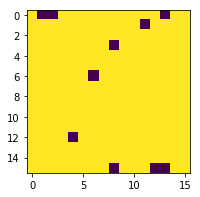

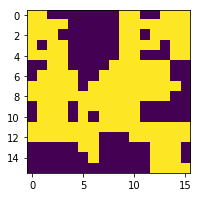

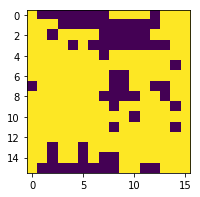

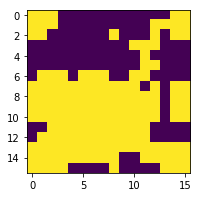

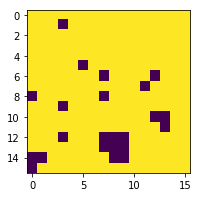

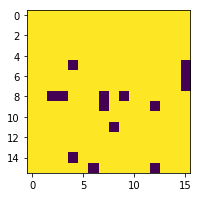

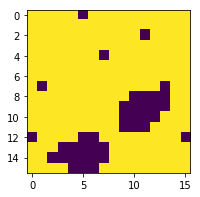

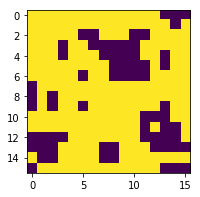

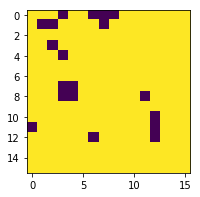

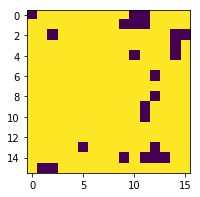

In [24]:
t = temperatures[25]
print(t)
I = np.arange(len(data.test_data[2]))
j = 0
for i in I[data.test_data[2]==t]:
    show_conf(data.test_data, i)
    j=j+1
    if j==10: break;